Estimado candidato,

Estamos encantados de que estés considerando unirte a nuestro equipo de ciencia de datos. Como parte de nuestro proceso de evaluación, te pedimos que completes la siguiente prueba técnica.

**Descripción de la tarea:**

Se te proporciona un conjunto de datos anónimos que consta de varias columnas nombradas como 'col1', 'col2', 'col3', etc., hasta 'col20', y una columna 'target' que representa la variable objetivo. Tu tarea es realizar un análisis exploratorio de datos (EDA) y construir un modelo de aprendizaje automático para predecir la variable 'target'.

**Detalles de la tarea:**

1. **Análisis exploratorio de datos (EDA):** Realiza un análisis exploratorio detallado de los datos. Esto debe incluir, pero no está limitado a:
   - Estadísticas descriptivas de las variables (mínimo, máximo, media, mediana, desviación estándar, etc.).
   - Verificación de valores perdidos o anómalos.
   - Análisis de correlación entre las variables.
   - Visualizaciones para entender mejor las distribuciones y relaciones de los datos.

2. **Preprocesamiento de datos:** Prepárate para realizar cualquier limpieza o transformación necesaria de los datos basándote en tu EDA.

3. **Creación de un modelo de línea base (Baseline):** Entrena varios modelos de aprendizaje automático para predecir la variable 'target'. Comienza con modelos sencillos como la regresión logística y avanza hacia modelos más complejos como los árboles de decisión, random forest, SVM, XGBoost, etc.

4. **Evaluación del modelo:** Evalúa el rendimiento de cada modelo utilizando métricas apropiadas. Por ejemplo, si 'target' es una variable binaria, podrías considerar la precisión, la sensibilidad, la especificidad, el AUC-ROC, etc.

5. **Selección del modelo:** Selecciona el modelo que creas que funciona mejor. Justifica tu elección basándote en las métricas de evaluación y cualquier otra consideración pertinente.

6. **Predicción:** Usa tu modelo seleccionado para hacer predicciones en el conjunto de datos.

**Entregables:**

Por favor, proporciona el código que hayas utilizado para completar esta tarea, junto con un informe detallado que explique tu enfoque y los resultados. El informe debe estar bien estructurado y ser fácil de seguir, permitiendo a los evaluadores entender tu proceso de pensamiento y las decisiones que hayas tomado.

¡Buena suerte y esperamos ver tu solución!

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

class DataCleaner:
    def __init__(self, df: pd.DataFrame):
        """Inicializa la clase con un DataFrame."""
        self.df = df.copy()
        self.numeric_vars = []
        self.categorical_vars = []

    def drop_duplicates(self):
        """Elimina filas duplicadas."""
        self.df.drop_duplicates(inplace=True)
        return self

    def fill_missing(self, column, method="mean", value=None):
        """Rellena valores nulos en una columna específica."""
        if pd.api.types.is_numeric_dtype(self.df[column]):
            if method == "mean":
                self.df[column].fillna(self.df[column].mean(), inplace=True)
            elif method == "median":
                self.df[column].fillna(self.df[column].median(), inplace=True)
            elif method == "value" and value is not None:
                self.df[column].fillna(value, inplace=True)
        else:  
            self.df[column].fillna(value if value is not None else self.df[column].mode()[0], inplace=True)
        return self

    def drop_columns(self, columns):
        """Elimina las columnas especificadas."""
        self.df.drop(columns=columns, inplace=True, errors="ignore")
        return self

    def normalize_text(self, column, remove_specials=False):
        """Normaliza texto en minúsculas y elimina caracteres especiales (opcional)."""
        self.df[column] = self.df[column].astype(str).str.lower().str.strip()
        
        return self
    
    def separate_variables(self):
        """Separa columnas en numéricas y categóricas."""
        self.numeric_vars = self.df.select_dtypes(include=['number']).columns.tolist()
        self.categorical_vars = self.df.select_dtypes(exclude=['number']).columns.tolist()
        return self

    def describe_numeric(self):
        """Devuelve un resumen de las variables numéricas."""
        return self.df[self.numeric_vars].describe() if self.numeric_vars else "No hay variables numéricas."

    def describe_categorical(self):
        """Resumen de variables categóricas con sus frecuencias."""
        if not self.categorical_vars:
            return "No hay variables categóricas."
        return {col: self.df[col].value_counts() for col in self.categorical_vars}

    def get_info(self):
        """Devuelve información del DataFrame como un string."""
        buffer = io.StringIO()
        self.df.info(buf=buffer)
        return buffer.getvalue()

    def get_cleaned_data(self):
        """Devuelve el DataFrame limpio."""
        return self.df
    
    ### 📊 FUNCIONES DE VISUALIZACIÓN ###
    
    def plot_missing_values(self):
        """Muestra un gráfico de barras con el porcentaje de valores nulos por columna."""
        missing = self.df.isnull().mean() * 100
        missing = missing[missing > 0]
        if missing.empty:
            print("No hay valores nulos en el DataFrame.")
            return
        plt.figure(figsize=(10, 5))
        missing.sort_values().plot(kind="barh", color="salmon")
        plt.xlabel("Porcentaje de valores nulos")
        plt.ylabel("Columnas")
        plt.title("Valores nulos por columna")
        plt.show()

    def plot_numeric_distributions(self):
        """Muestra histogramas de las variables numéricas."""
        if not self.numeric_vars:
            print("No hay variables numéricas para graficar.")
            return
        self.df[self.numeric_vars].hist(figsize=(12, 8), bins=20, color="skyblue", edgecolor="black")
        plt.suptitle("Distribución de variables numéricas")
        plt.show()

    def plot_categorical_counts(self, top_n=10):
        """Muestra gráficos de barras para las variables categóricas más frecuentes."""
        if not self.categorical_vars:
            print("No hay variables categóricas para graficar.")
            return
        for col in self.categorical_vars:
            plt.figure(figsize=(10, 4))
            self.df[col].value_counts().nlargest(top_n).plot(kind="bar", color="lightcoral", edgecolor="black")
            plt.title(f"Frecuencia de valores en {col}")
            plt.xlabel(col)
            plt.ylabel("Frecuencia")
            plt.xticks(rotation=45)
            plt.show()

    def plot_correlation_matrix(self):
        """Muestra una matriz de correlación para variables numéricas."""
        if len(self.numeric_vars) < 2:
            print("No hay suficientes variables numéricas para calcular la correlación.")
            return
        plt.figure(figsize=(10, 6))
        sns.heatmap(self.df[self.numeric_vars].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
        plt.title("Matriz de correlación")
        plt.show()

    def plot_boxplots(self):
        """Muestra boxplots para detectar valores atípicos en variables numéricas."""
        if not self.numeric_vars:
            print("No hay variables numéricas para graficar.")
            return
        plt.figure(figsize=(12, 6))
        self.df[self.numeric_vars].boxplot(rot=45)
        plt.title("Boxplots de variables numéricas")
        plt.ylabel("Valores")
        plt.show()


1. ANALISIS EXPLORATORIO DE DATOS (EDA)

El objetivo de este primer analisis es entender los datos, encontrar patrones, detectar anomalías y decidir que transformaciones pueden ser necesarias antes de aplicar el modelo

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
0,4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,...,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08,0
1,1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,...,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06,0
2,7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,...,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01,0
3,6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,...,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05,0
4,5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1


In [3]:
cleaner =DataCleaner(df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5597 non-null   int64  
 1   col1    5597 non-null   float64
 2   col2    5597 non-null   float64
 3   col3    5597 non-null   float64
 4   col4    5597 non-null   float64
 5   col5    5597 non-null   float64
 6   col6    5597 non-null   float64
 7   col7    5597 non-null   float64
 8   col8    5597 non-null   float64
 9   col9    5597 non-null   float64
 10  col10   5597 non-null   float64
 11  col11   5597 non-null   float64
 12  col12   5597 non-null   float64
 13  col13   5597 non-null   float64
 14  col14   5597 non-null   float64
 15  col15   5597 non-null   float64
 16  col16   5597 non-null   float64
 17  col17   5597 non-null   float64
 18  col18   5597 non-null   float64
 19  col19   5597 non-null   float64
 20  col20   5597 non-null   float64
 21  target  5597 non-null   int64  
dtype

In [5]:
df.set_index("ID", inplace=True)


In [6]:
df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
ID,,,,,,,,,,,,,,,,,,,,,
4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,0.00,...,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08,0
1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,0.82,...,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06,0
7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,0.00,...,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01,0
6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,0.23,...,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05,0
5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1


1.1 Estadisticas Descriptivas

A continuación se muestran las estadisticas descriptivas (media, mediana, desviación estandar, mínimo y máximo) que nos ayudarán a entender las características principales de los datos antes de aplicar el modelo de Machine Learning.

In [7]:
df.describe()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
count,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,...,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000
mean,0.674797,14.438840,0.163603,1.579702,0.042747,2.213093,0.250890,0.807654,0.766057,0.324309,...,0.100050,9.819267,1.331880,0.005194,16.621249,2.931896,0.049602,0.149855,0.044999,0.114347
std,1.273677,8.851097,0.254659,1.221220,0.036072,2.581244,0.272472,0.652471,0.436435,0.328954,...,0.057997,5.581795,0.568734,0.002960,17.729833,2.327347,0.028827,0.144170,0.026929,0.318261
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.850000,0.030000,0.550000,0.008000,0.100000,0.050000,0.090000,0.400000,0.000000,...,0.049000,4.940000,1.010000,0.003000,2.220000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.390000,0.050000,1.210000,0.040000,0.550000,0.090000,0.750000,0.760000,0.230000,...,0.103000,9.860000,1.420000,0.005000,7.840000,2.430000,0.050000,0.080000,0.050000,0.000000
75%,0.290000,22.260000,0.100000,2.510000,0.070000,4.330000,0.450000,1.390000,1.160000,0.610000,...,0.151000,14.690000,1.760000,0.008000,29.980000,4.670000,0.070000,0.250000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.660000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.820000,2.890000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [8]:
df.duplicated().sum()



np.int64(0)

1.2 Verificación de valores perdidos o anómalos

Al no tener valores nulos ni duplicados como se ha visto anteriormente, nos centramos en detectar los outliers del conjunto de datos, esto nos ayudará para saber si tenemos que estandarizar o normalizar los datos de alguna manera antes de aplicar el modelo de Machine Learning.

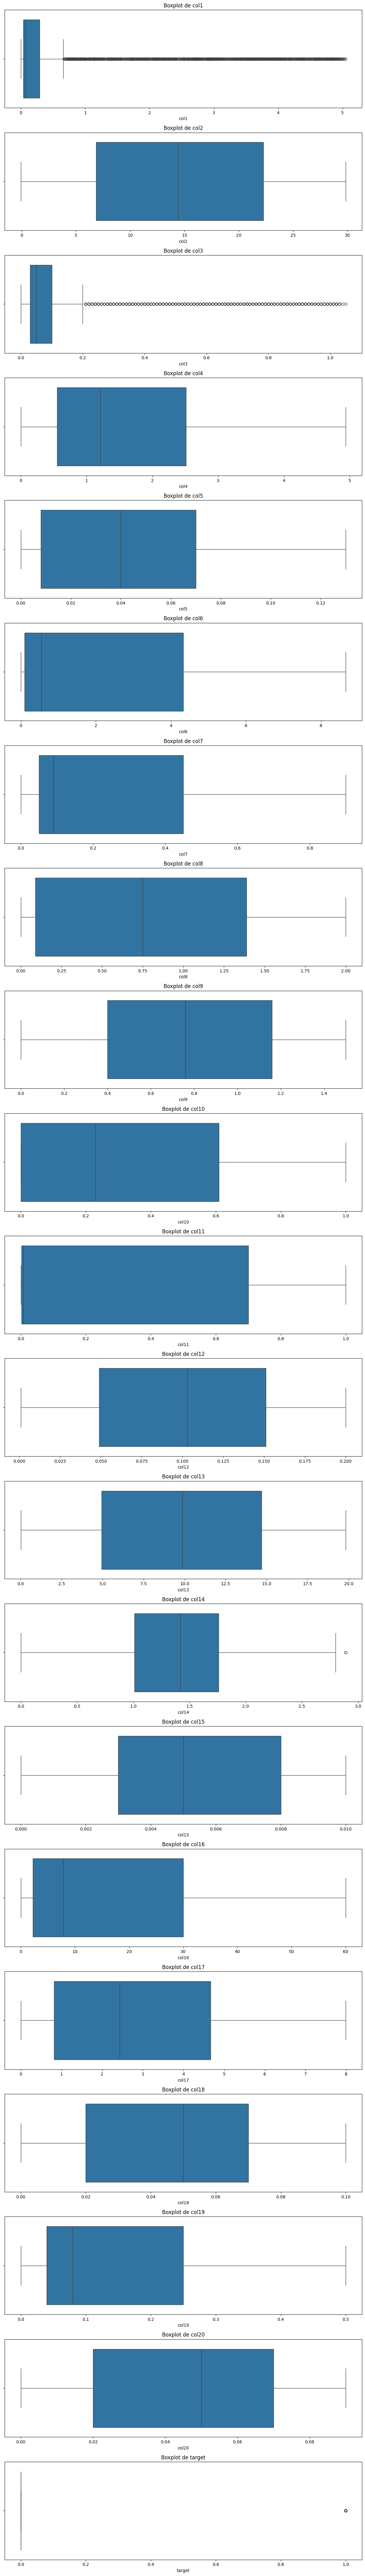

In [9]:
num_columnas = df.select_dtypes(include=[np.number]).shape[1]

plt.figure(figsize=(12, num_columnas * 4))

for i, columna in enumerate(df.select_dtypes(include=[np.number]).columns):
    plt.subplot(num_columnas, 1, i + 1)
    sns.boxplot(x=df[columna])
    plt.title(f'Boxplot de {columna}')

plt.tight_layout() 
plt.show()


1.3 Análisis de correlación entre variables

En este punto analizaremos la correlación entre las variables para determinar la dependencia o no entre variables. Una correlación positiva indica que una variable aumenta, la otra también, mientras que una correlación negativa indica que una variable aumenta, la otra disminuye. Si no hay correlación, los cambios en una variable no están relacionados con los cambios en la otra.

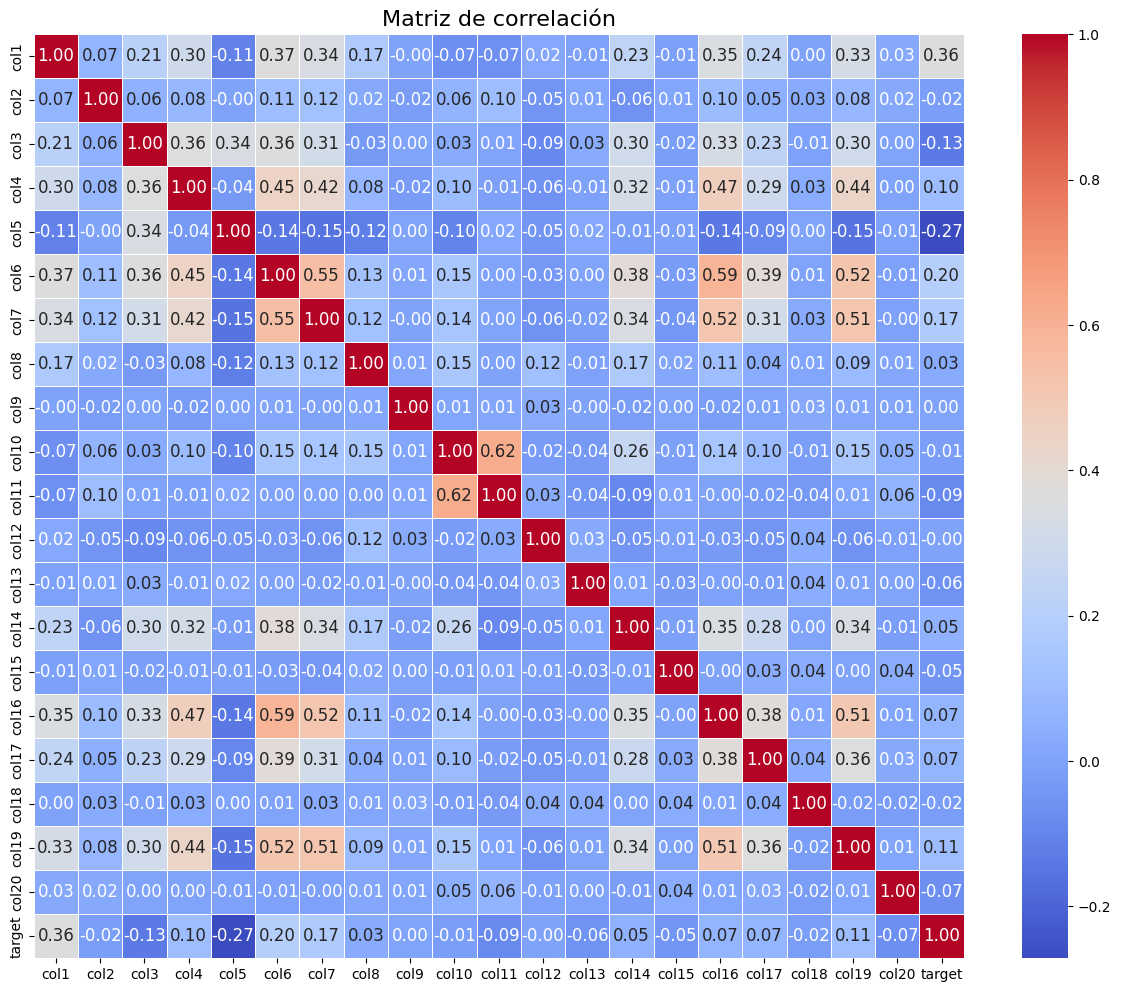

In [10]:
# Calcular la matriz de correlación
correlacion = df.corr()

plt.figure(figsize=(15, 12))  # Ajustar el tamaño de la figura (ancho, alto)

# Crear el heatmap
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={'size': 12})

# Título
plt.title('Matriz de correlación', fontsize=16)
plt.show()



1.4 Visualizaciones

Para comprobar la distribución de todas las variables se grafica cada una de las variables, también se realiza un test de Shapiro para corroborar la normalidad de cada una

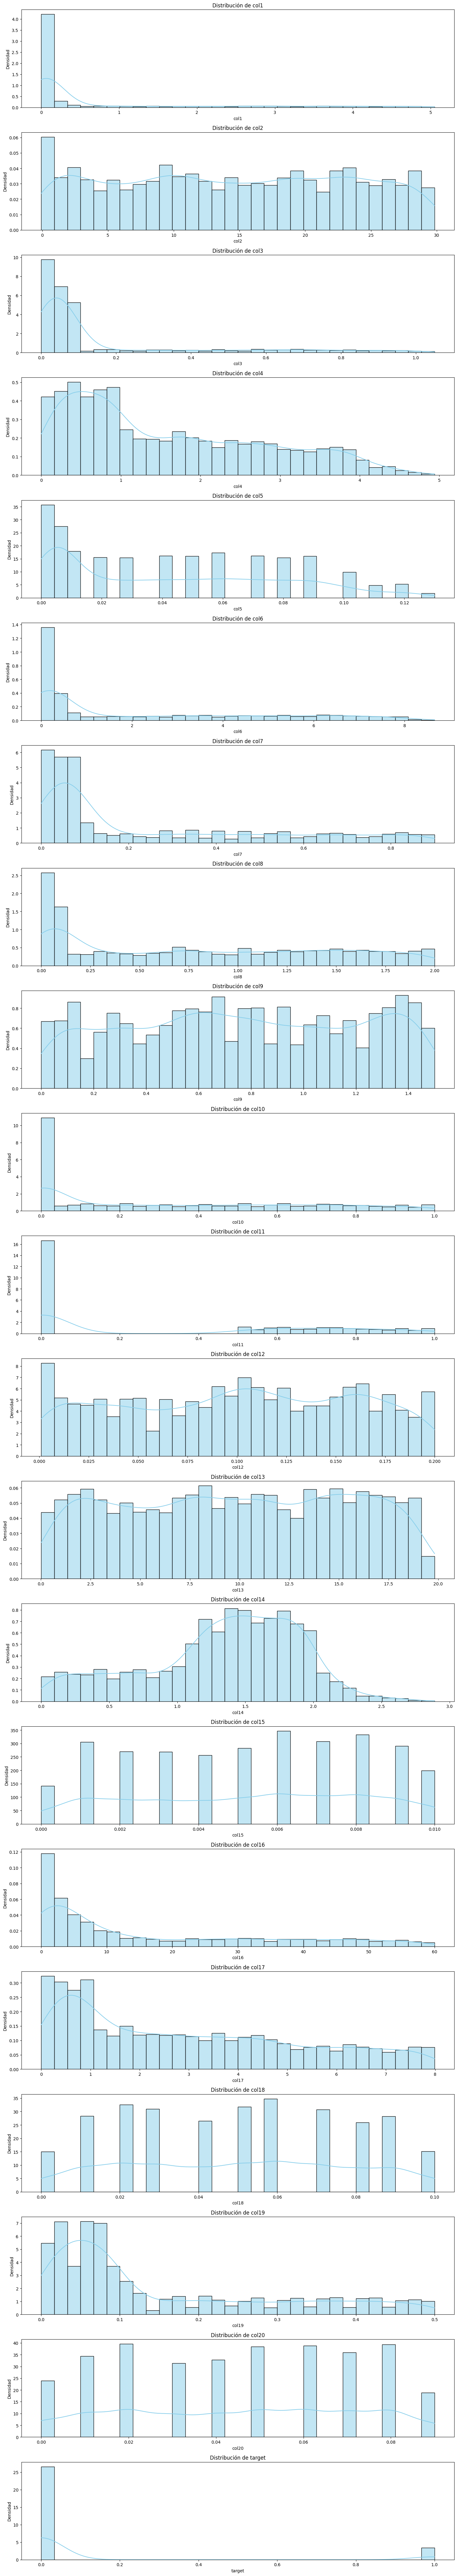

In [11]:
# Filtrar solo las columnas numéricas
num_columnas = df.select_dtypes(include=['float64', 'int64']).columns

# Configurar el tamaño de la figura correctamente usando la longitud de las columnas numéricas
plt.figure(figsize=(15, len(num_columnas) * 4))

# Graficar histogramas y KDE para cada variable
for i, columna in enumerate(num_columnas):
    plt.subplot(len(num_columnas), 1, i + 1)
    sns.histplot(df[columna], kde=True, bins=30, color='skyblue', stat='density')
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Densidad')

plt.tight_layout()  # Para evitar que se solapen los gráficos
plt.show()





In [12]:
from scipy.stats import shapiro

# Test de Shapiro-Wilk para cada columna
for columna in num_columnas:
    stat, p_value = shapiro(df[columna].dropna())
    print(f'{columna}: Estadístico={stat:.4f}, p-valor={p_value:.4f}')
    
    if p_value > 0.05:
        print(f"{columna} parece seguir una distribución normal (p > 0.05)\n")
    else:
        print(f"{columna} no sigue una distribución normal (p <= 0.05)\n")


col1: Estadístico=0.5706, p-valor=0.0000
col1 no sigue una distribución normal (p <= 0.05)

col2: Estadístico=0.9500, p-valor=0.0000
col2 no sigue una distribución normal (p <= 0.05)

col3: Estadístico=0.6239, p-valor=0.0000
col3 no sigue una distribución normal (p <= 0.05)

col4: Estadístico=0.9173, p-valor=0.0000
col4 no sigue una distribución normal (p <= 0.05)

col5: Estadístico=0.9068, p-valor=0.0000
col5 no sigue una distribución normal (p <= 0.05)

col6: Estadístico=0.7978, p-valor=0.0000
col6 no sigue una distribución normal (p <= 0.05)

col7: Estadístico=0.7983, p-valor=0.0000
col7 no sigue una distribución normal (p <= 0.05)

col8: Estadístico=0.9018, p-valor=0.0000
col8 no sigue una distribución normal (p <= 0.05)

col9: Estadístico=0.9540, p-valor=0.0000
col9 no sigue una distribución normal (p <= 0.05)

col10: Estadístico=0.8537, p-valor=0.0000
col10 no sigue una distribución normal (p <= 0.05)

col11: Estadístico=0.7490, p-valor=0.0000
col11 no sigue una distribución norm

c:\Users\javier.sdiaz\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-6v7GiuDz-py3.10\lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5597.
  res = hypotest_fun_out(*samples, **kwds)


2. PREPROCESAMIENTO

2.1 Feature Engineer

Una vez realizada la matriz de correlación, se eliminan las columnas que no se consideran importante para predecir la variable objetivo, en este caso se ha realizado una exclusión de los valores <0.05 de relación con la target.

In [13]:
# Eliminar una o varias columnas especificadas
df_limpio = df.drop(columns=['col8','col9','col10','col12','col14','col15','col18'])
df_limpio


,col1,col2,col3,col4,col5,col6,col7,col11,col13,col16,col17,col19,col20,target
ID,,,,,,,,,,,,,,
4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,0.009,9.52,1.24,0.96,0.08,0.08,0
1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,0.820,13.83,10.55,3.76,0.45,0.06,0
7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.000,2.61,4.13,0.27,0.03,0.01,0
6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.004,5.22,11.32,0.25,0.01,0.05,0
5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,0.670,9.75,27.17,5.42,0.19,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,0.01,8.92,0.20,4.88,0.050,0.36,0.09,0.004,8.60,17.18,2.91,0.43,0.09,0
2130,0.09,1.36,0.04,3.45,0.003,3.42,0.03,0.001,9.36,42.15,4.39,0.11,0.07,0
5005,0.10,4.95,0.01,0.25,0.040,0.09,0.10,0.007,18.78,5.97,0.32,0.10,0.08,0


Además de la matriz de correlación se realiza un Feature importance para corroborar la importancia de las variables

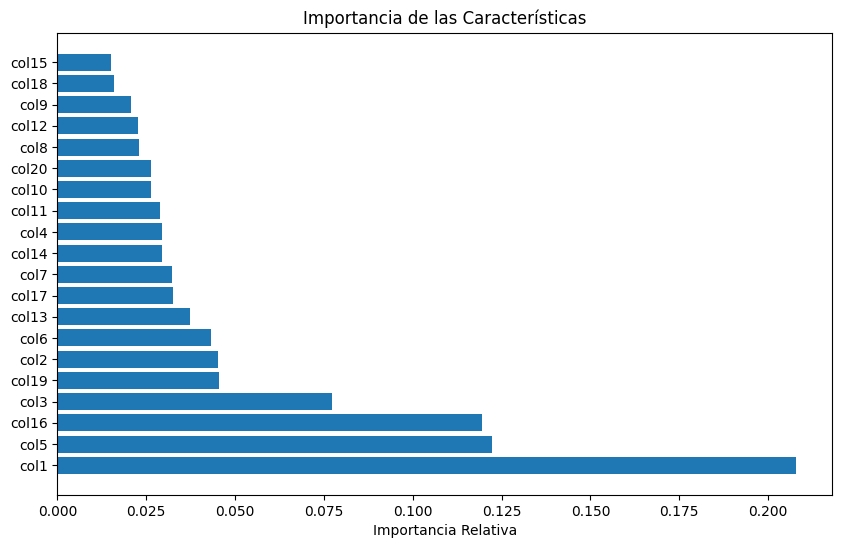

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar un modelo Random Forest
X = df.drop('target', axis=1)  # Variables de entrada
y = df['target']  # Variable objetivo

model = RandomForestClassifier()
model.fit(X, y)

# Obtener la importancia de las características
importances = model.feature_importances_

# Ordenar las características por importancia
indices = importances.argsort()[::-1]

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title("Importancia de las Características")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlabel("Importancia Relativa")
plt.show()


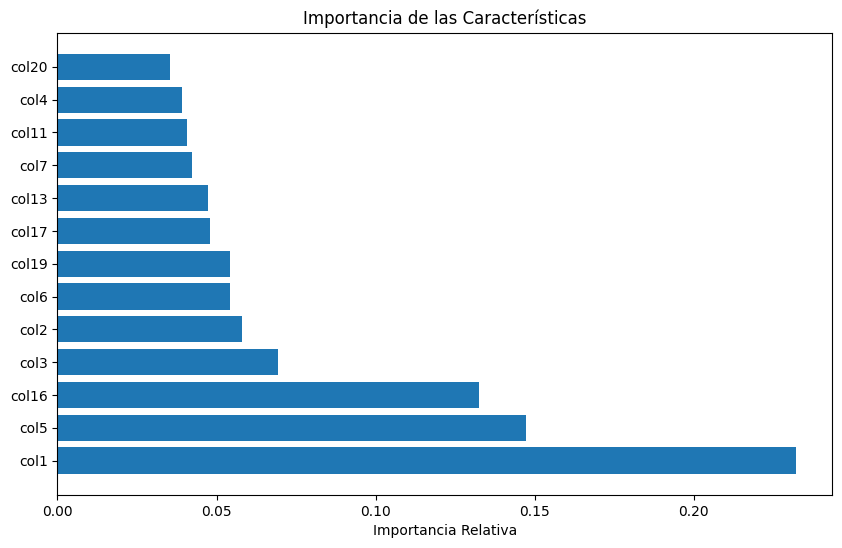

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar un modelo Random Forest
X = df_limpio.drop('target', axis=1)  # Variables de entrada
y = df_limpio['target']  # Variable objetivo

model = RandomForestClassifier()
model.fit(X, y)

# Obtener la importancia de las características
importances = model.feature_importances_

# Ordenar las características por importancia
indices = importances.argsort()[::-1]

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title("Importancia de las Características")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlabel("Importancia Relativa")
plt.show()


3. MACHINE LEARNING

Se separan los valores en train y test para el entrenamiento y la validación de los modelos

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import pandas as pd

# Definir X (features) e y (target)
X = df_limpio.drop('target', axis=1)  # Features (sin la columna 'target')
y = df_limpio['target']  # Target


# 🔹 Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

# 🔹 Verificar la cantidad de clases antes y después
print("Distribución antes de SMOTE:")
print(pd.Series(y).value_counts())

print("\nDistribución después de SMOTE:")
print(pd.Series(y_train_resampled).value_counts())


In [ ]:
# Definir X (features) e y (target)
X = df_limpio.drop('target', axis=1)  # Features (sin la columna 'target')
y = df_limpio['target']  # Target

# Dividir los datos en entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




A partir de aquí se han utilizado varios modelos de predicción, calculando siempre la curva AU-ROC para cada modelo, con esto podremos obtener la capacidad de cada modelo para distinguir entre dos clases.

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=500)  # Aumenta el número de iteraciones
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Precisión de la Regresión Logística: {accuracy_logreg:.4f}")

from sklearn.metrics import classification_report, confusion_matrix

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
print("Matriz de Confusión:\n", conf_matrix)

# Reporte detallado de clasificación
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_logreg))




Precisión de la Regresión Logística: 0.9000
Matriz de Confusión:
 [[968  24]
 [ 88  40]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       992
           1       0.62      0.31      0.42       128

    accuracy                           0.90      1120
   macro avg       0.77      0.64      0.68      1120
weighted avg       0.88      0.90      0.88      1120



AUC-ROC: 0.8488


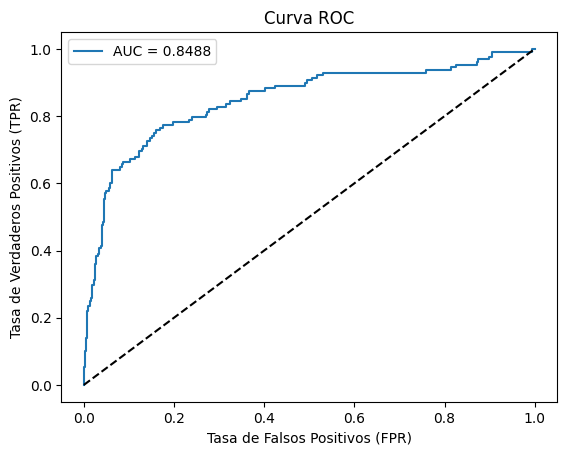

In [80]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Probabilidades de predicción
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

# Calcular AUC-ROC
auc_logreg = roc_auc_score(y_test, y_prob_logreg)
print(f"AUC-ROC: {auc_logreg:.4f}")

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_logreg)
plt.plot(fpr, tpr, label=f"AUC = {auc_logreg:.4f}")
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.show()


In [81]:
from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar el modelo
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_tree = tree.predict(X_test)

# Evaluar el modelo
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Precisión del Árbol de Decisión: {accuracy_tree:.4f}")



Precisión del Árbol de Decisión: 0.9420


AUC-ROC: 0.8618


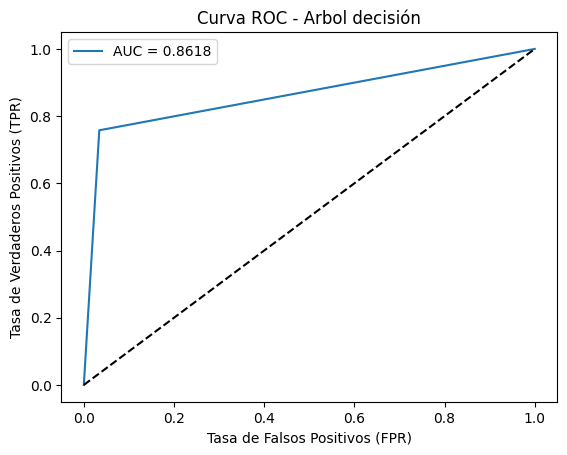

In [82]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Probabilidades de predicción
y_prob_rf = tree.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

# Calcular AUC-ROC
auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"AUC-ROC: {auc_rf:.4f}")

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label=f"AUC = {auc_rf:.4f}")
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC - Arbol decisión")
plt.legend()
plt.show()


In [83]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_rf = rf.predict(X_test)

# Evaluar el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Precisión del Random Forest: {accuracy_rf:.4f}")


Precisión del Random Forest: 0.9580


AUC-ROC: 0.9573


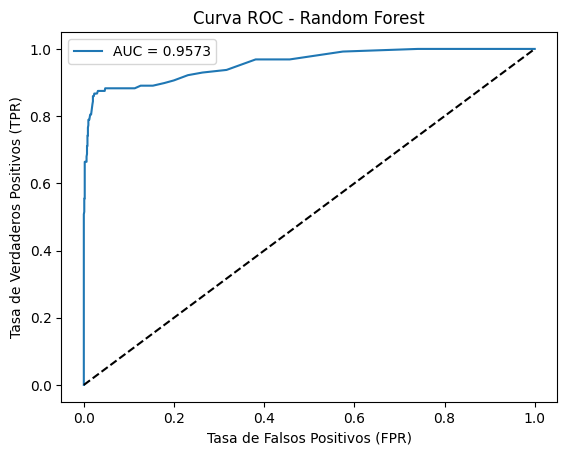

In [84]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Probabilidades de predicción
y_prob_rf = rf.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

# Calcular AUC-ROC
auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"AUC-ROC: {auc_rf:.4f}")

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label=f"AUC = {auc_rf:.4f}")
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.show()


In [85]:
from sklearn.svm import SVC

# Crear y entrenar el modelo
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_svm = svm.predict(X_test)

# Evaluar el modelo
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Precisión del SVM: {accuracy_svm:.4f}")


Precisión del SVM: 0.8857


AUC-ROC: 0.8705


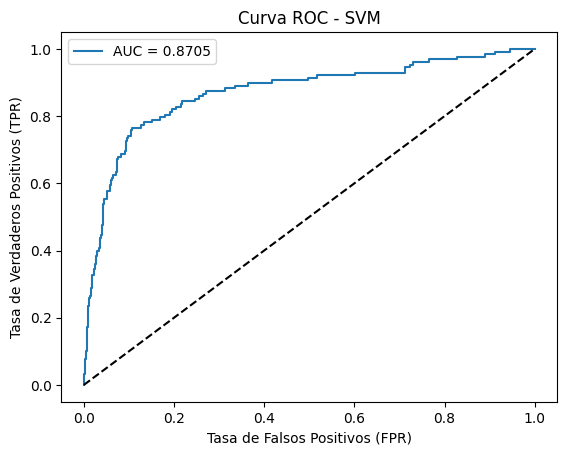

In [86]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Cambiar la configuración del modelo para obtener probabilidades
svm_prob = SVC(probability=True, random_state=42)  
svm_prob.fit(X_train, y_train)

# Predecir probabilidades
y_prob_svm = svm_prob.predict_proba(X_test)[:, 1]  

# Calcular AUC-ROC
auc_svm = roc_auc_score(y_test, y_prob_svm)
print(f"AUC-ROC: {auc_svm:.4f}")

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
plt.plot(fpr, tpr, label=f"AUC = {auc_svm:.4f}")
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC - SVM")
plt.legend()
plt.show()


In [87]:
import xgboost as xgb

# Crear y entrenar el modelo
xgboost_model = xgb.XGBClassifier(random_state=42)
xgboost_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_xgb = xgboost_model.predict(X_test)

# Evaluar el modelo
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Precisión de XGBoost: {accuracy_xgb:.4f}")


Precisión de XGBoost: 0.9643


AUC-ROC: 0.9711


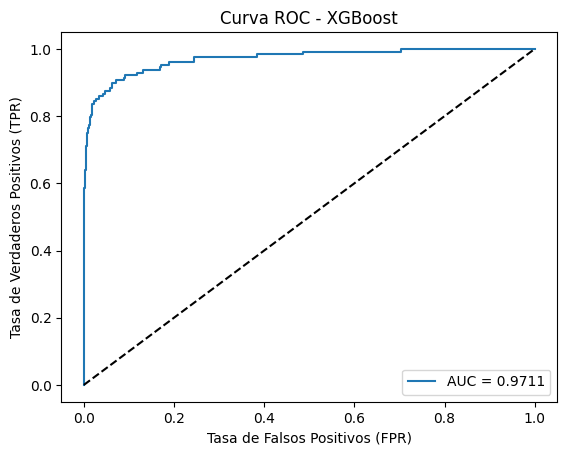

In [88]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Probabilidades de predicción
y_prob_xgb = xgboost_model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

# Calcular AUC-ROC
auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print(f"AUC-ROC: {auc_xgb:.4f}")

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
plt.plot(fpr, tpr, label=f"AUC = {auc_xgb:.4f}")
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC - XGBoost")
plt.legend()
plt.show()


In [89]:
# Comparar las precisiones de los modelos
model_accuracies = {
    'Regresión Logística': accuracy_logreg,
    'Árbol de Decisión': accuracy_tree,
    'Random Forest': accuracy_rf,
    'SVM': accuracy_svm,
    'XGBoost': accuracy_xgb
}

# Mostrar la precisión de todos los modelos
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.4f}")


Regresión Logística: 0.9000
Árbol de Decisión: 0.9420
Random Forest: 0.9580
SVM: 0.8857
XGBoost: 0.9643


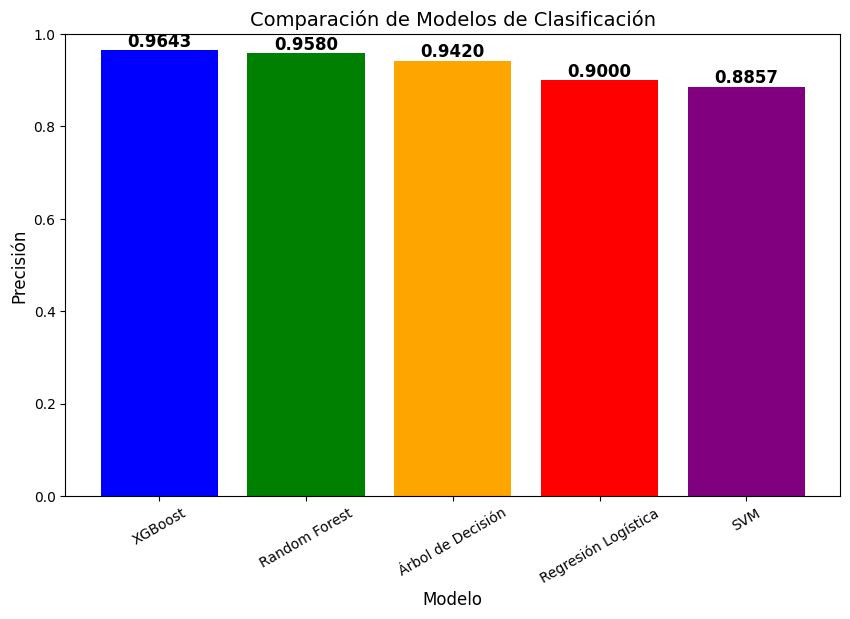

In [90]:
import matplotlib.pyplot as plt

# Ordenar los modelos de mayor a menor precisión
sorted_models = sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True)
model_names, accuracies = zip(*sorted_models)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])

# Agregar los valores encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.4f}", ha='center', va='bottom', fontsize=12, fontweight='bold')

# Configurar el título y etiquetas
plt.title('Comparación de Modelos de Clasificación', fontsize=14)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Precisión', fontsize=12)
plt.ylim(0, 1)  # Asegurar que el eje Y va de 0 a 1
plt.xticks(rotation=30)  # Rotar etiquetas para mejor visualización
plt.show()


Una vez comparados los 5 modelos, se escoge el Random Forest debido a al ser un modelo basado en múltiples arboles de decisión, permite reducir el sobreajuste en comparación al resto de modelos.
La curva AU-ROC tiene un valor muy cercano a 1, además tiene una precisión de 0.9589 lo que nos asegura una alta precisión.

Se escoge el Random Forest frente al XGBoost debido a que el tiempo de entrenamiento es más rápido.

In [91]:
predict = pd.read_csv('data/test.csv')
predict.head()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20
0,2816,0.06,25.18,0.04,0.04,0.001,5.10,0.86,1.23,0.52,...,0.620,0.022,12.63,1.93,0.003,1.19,7.79,0.04,0.43,0.01
1,3641,0.09,27.51,0.63,2.05,0.110,6.81,0.83,0.09,1.21,...,0.730,0.001,4.49,1.95,0.009,52.30,1.00,0.10,0.12,0.01
2,7191,0.09,1.10,0.07,0.73,0.050,0.10,0.01,1.44,1.42,...,0.007,0.177,1.03,1.27,0.002,7.04,0.38,0.06,0.05,0.06
3,5199,0.07,11.23,0.04,1.22,0.030,0.16,0.03,1.18,0.88,...,0.001,0.032,4.07,0.98,0.003,1.28,0.51,0.06,0.03,0.07
4,7994,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,...,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00


In [92]:
predict_limpio = predict.drop(columns=[ 'col8','col9','col10','col12','col14','col15','col18'])
predict_limpio.head()


,ID,col1,col2,col3,col4,col5,col6,col7,col11,col13,col16,col17,col19,col20
0,2816,0.06,25.18,0.04,0.04,0.001,5.10,0.86,0.620,12.63,1.19,7.79,0.43,0.01
1,3641,0.09,27.51,0.63,2.05,0.110,6.81,0.83,0.730,4.49,52.30,1.00,0.12,0.01
2,7191,0.09,1.10,0.07,0.73,0.050,0.10,0.01,0.007,1.03,7.04,0.38,0.05,0.06
3,5199,0.07,11.23,0.04,1.22,0.030,0.16,0.03,0.001,4.07,1.28,0.51,0.03,0.07
4,7994,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00


In [93]:
predict_limpio.set_index("ID", inplace=True)
predict_limpio.head()

,col1,col2,col3,col4,col5,col6,col7,col11,col13,col16,col17,col19,col20
ID,,,,,,,,,,,,,
2816,0.06,25.18,0.04,0.04,0.001,5.10,0.86,0.620,12.63,1.19,7.79,0.43,0.01
3641,0.09,27.51,0.63,2.05,0.110,6.81,0.83,0.730,4.49,52.30,1.00,0.12,0.01
7191,0.09,1.10,0.07,0.73,0.050,0.10,0.01,0.007,1.03,7.04,0.38,0.05,0.06
5199,0.07,11.23,0.04,1.22,0.030,0.16,0.03,0.001,4.07,1.28,0.51,0.03,0.07
7994,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00


In [95]:
# Seleccionar correctamente las columnas del DataFrame
X_test = predict_limpio[["col1","col2", "col3", "col4", "col5", "col6", "col7", "col11", "col13", "col16", "col17", "col19", "col20"]]


# Hacer predicciones
y_predict = rf.predict(X_test)

y_predict


array([0, 0, 0, ..., 0, 0, 1])